In [4]:
import torch
torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device(type='cuda', index=0)

['NanumGothic']


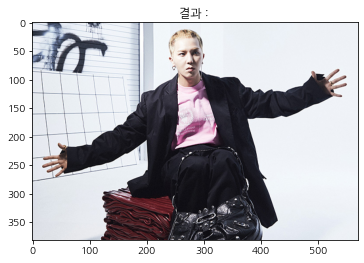

In [6]:
import matplotlib
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

fontpath = 'C:/Windows/Fonts/NanumGothicLight.ttf'
font = fm.FontProperties(fname=fontpath, size=10).get_name()
plt.rc('font', family=font)

print(plt.rcParams['font.family'])



image = 'test_image.jpg'
image = img.imread(image)

plt.imshow(image)
plt.title('결과 : ')
plt.show()

torch.Size([1, 3, 224, 224])
['dog', 'rabbit', 'cat']
Prediction 1 : dog , Score:  9.528422
Prediction 2 : rabbit , Score:  3.4736245
Prediction 3 : cat , Score:  1.8371087


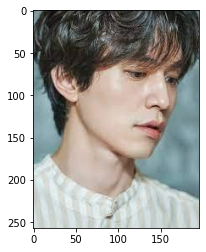

In [33]:
import torch
import torchvision
from torchvision import models, datasets, transforms
import os
import matplotlib.pyplot as plt

model = torch.load("./weight/model_best_epoch.pt")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

data_dir = './data'
train_datasets = datasets.ImageFolder(os.path.join(data_dir,'train'), transforms_train)
class_names = train_datasets.classes

from PIL import Image
image = './static/img.jpg'
image = Image.open(image)
plt.imshow(image)

image = transforms_test(image).unsqueeze(0).to(device)
print(image.size())


with torch.no_grad():
    model.eval()
    outputs = model(image)
    outputs = torch.exp(outputs)
    topk, topclass = outputs.topk(3, dim=1) # argmax와 비슷하게 top-k에 대한 결과 값을 받는다.
    #cls = class_names[topclass.cpu().numpy()[0][0]]
    #score = topk.cpu().numpy()[0][0]
    
    classes = [class_names[i] for i in topclass.cpu().numpy()[0]]
    print(classes)

    for i in range(3):
            print("Prediction", i+1, ":", class_names[topclass.cpu().numpy()[0][i]], ", Score: ", topk.cpu().numpy()[0][i])

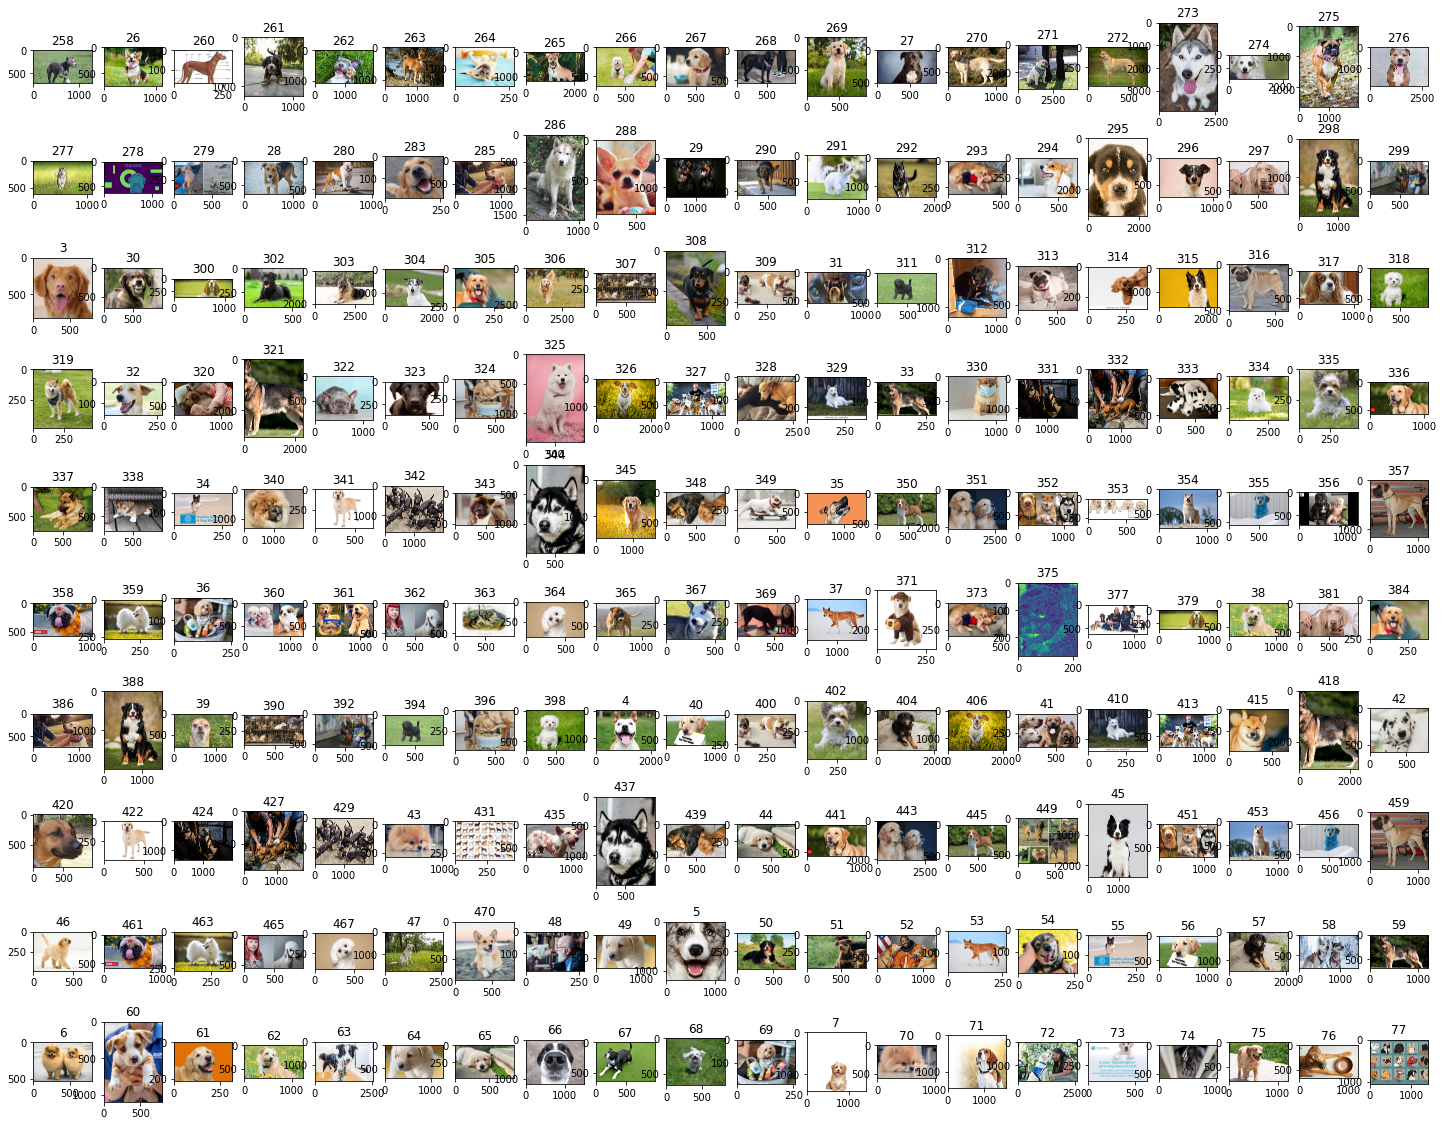

In [20]:
from glob import glob
from PIL import Image

train_images = []
train_dir = './data/train'

train_folders = sorted(glob(train_dir + '/*'), key = lambda x: x.split("\\")[-1].split('.')[0])
for train_folder in train_folders:
    image_paths = glob(train_folder + '/*')
    for image_path in image_paths: train_images.append(image_path)

plt.figure(figsize = (25,20))
for i in range(200):
  plt.subplot(10,20,i+1)
  ti = train_images[i+700]
  img = Image.open(ti)
  img = np.array(img, np.uint8)
  plt.imshow(img)
  plt.subplot(10,20,i+1).set_title(ti.split("\\")[-1].split('.')[0])

plt.show()